In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils)

In [3]:
probs = lambda data,theta: torch.exp(dc.Igaussmix_loglike(data.n[1:],*theta2params(theta,theta.size(0)//3)))
probs_sep = lambda data,m,s,r: torch.exp(dc.Igaussmix_loglike(data.n[1:],m,s,r))

In [4]:
data_SA = load_dataset('vega_data/SA_clean_data.csv',remove_zeros=True)
data_SA.evaluate(lr=.01,dir_factor=.9)

7.762277756288237 -995.2056911534935 -677.9575866100192
7.61688694726596 -986.769456269305 -655.6681111247716
7.489184606814895 -979.2286721111661 -635.5760391418172
7.347213370243846 -966.0737550697893 -617.7065803304243
7.201246454790875 -950.9944677204221 -601.5244936246276
7.078696457031557 -940.1095889770402 -586.6171014042279
6.985540976529871 -933.5969223308407 -573.5470589021954
6.912550661492846 -929.6777040169129 -562.0011167099112
6.849570324989214 -926.8322075748606 -551.3952319952573
6.793840163064472 -924.7748796840287 -541.5929758496629
6.746585190025036 -923.8032241990952 -532.525907962869
6.705383949517595 -923.2926824832316 -524.2150705248725
6.6670392209321685 -922.6743615954101 -516.6276924680802
6.632680191451534 -922.2102238669441 -509.73489486554035
6.600439133510317 -921.6401922822698 -503.3861751654857
6.571083733068593 -921.269682228916 -497.49471748277807
6.5451018594042125 -921.1114294350473 -492.09446573903335
6.52069266570539 -920.8367007793954 -487.115488

(tensor([1.5795e+04, 2.1184e+03, 5.3869e+02, 4.9533e+03, 3.9649e+04, 1.6486e+03,
         3.5934e+01, 1.9385e+02, 1.3258e+03, 4.5571e+03, 4.2696e+03, 4.1415e+02,
         1.6177e+02, 7.0440e+04, 6.5168e+00, 1.0630e+00, 1.0104e+00, 1.0103e+00,
         1.0104e+00, 1.0120e+00, 1.0102e+00, 1.0102e+00, 1.0102e+00],
        device='cuda:0', dtype=torch.float64),
 tensor([3.8592e+03, 5.7720e+02, 1.3190e+02, 1.0156e+03, 8.5158e+03, 4.6950e+02,
         8.5145e+00, 3.4619e+01, 4.0046e+02, 1.2236e+03, 1.2714e+03, 1.1960e+02,
         4.7428e+01, 1.7549e+04, 3.1479e+00, 5.4106e-01, 3.7195e-01, 3.7184e-01,
         3.7435e-01, 4.2395e-01, 3.7180e-01, 3.7170e-01, 3.7166e-01],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1213, 0.1087, 0.0991, 0.0840, 0.0813, 0.0740, 0.0735, 0.0693, 0.0559,
         0.0554, 0.0475, 0.0410, 0.0234, 0.0233, 0.0098, 0.0070, 0.0060, 0.0051,
         0.0042, 0.0035, 0.0028, 0.0022, 0.0017], device='cuda:0',
        dtype=torch.float64))

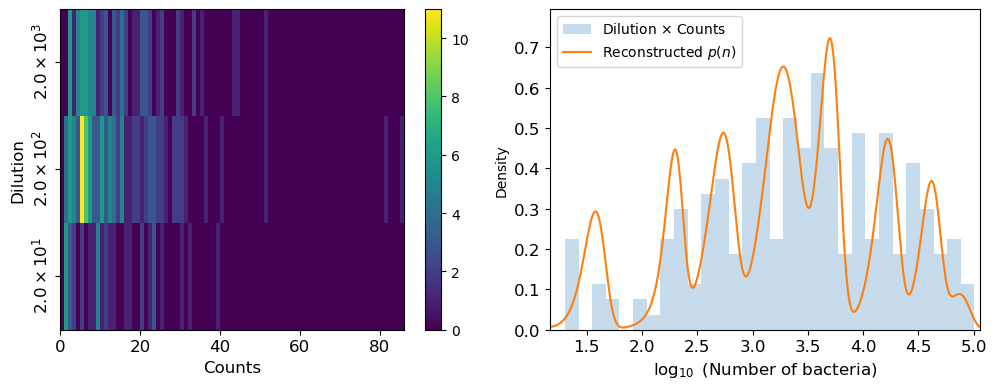

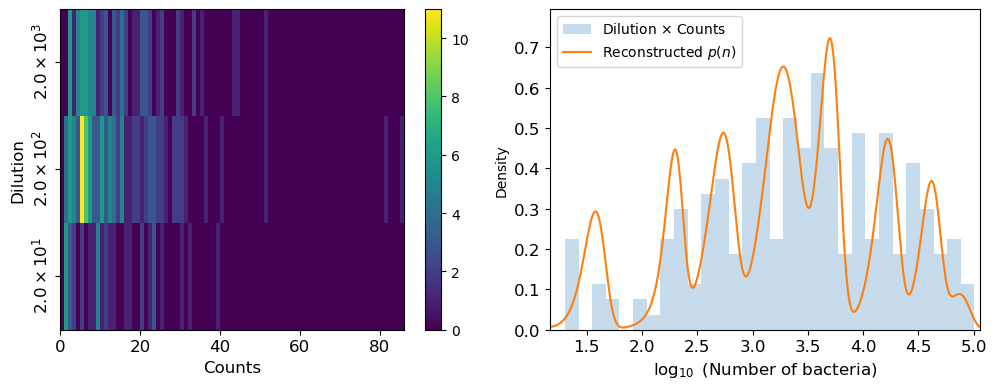

In [5]:
data_SA.make_plot(filename='graphs/real/SA_densities.png')

In [6]:
g = []
params = []

In [7]:
def get_map(dirfactor,numcomponents):
    data_SA.evaluate(lr=.01,components=numcomponents,dir_factor=dirfactor)
    g.append(data_SA.ev)
    params.append([dirfactor,numcomponents])
    data_SA.make_plot(filename='graphs/real/SA_densities_dir={}_comp={}.png'.format(dirfactor,numcomponents))

7.674426701735466 -990.5292611817764 -663.8572909639327
7.532622842037757 -981.0462165924384 -643.0705643706251
7.392752357588138 -969.7683162023895 -623.9235340641479
7.248649889679827 -955.6692135024116 -607.0311187627501
7.119526033889577 -943.5579036767066 -591.7896763685444
7.018006540046334 -936.1831823771545 -577.8189034010468
6.939117420405083 -931.7588356229696 -565.5901037496083
6.875240681835541 -928.9194153709627 -554.8529935507336
6.817716680303464 -926.5106701205723 -544.9221415005889
6.764180086984866 -924.3236799765241 -535.645143593609
6.717615590537166 -922.9302381417824 -527.1779706334296
6.679303488316853 -922.4138366937618 -519.5567698429256
6.64581501543108 -922.0927150453667 -512.7189976557755
6.615410514189346 -921.8368594393787 -506.4643563549858
6.587231314684865 -921.5961143546253 -500.6599871791923
6.56105735754214 -921.4014904415928 -495.2470576338145
6.536922842988136 -921.2667934629591 -490.20677540366086
6.514187274850418 -921.068047885114 -485.516840492

[None, None]

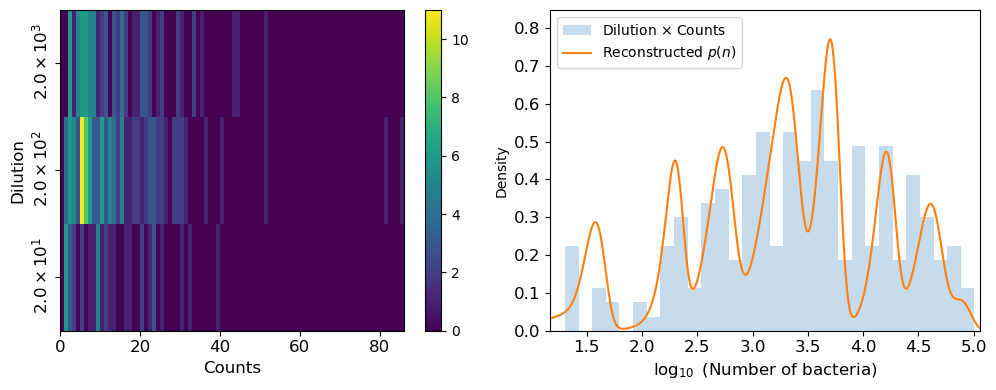

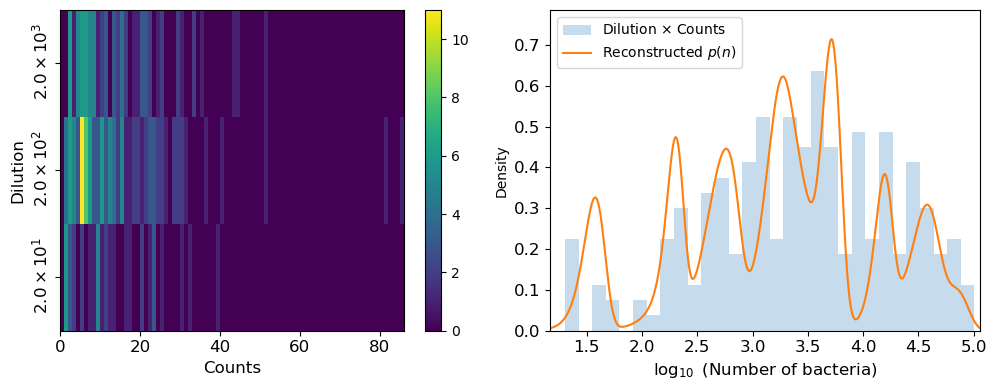

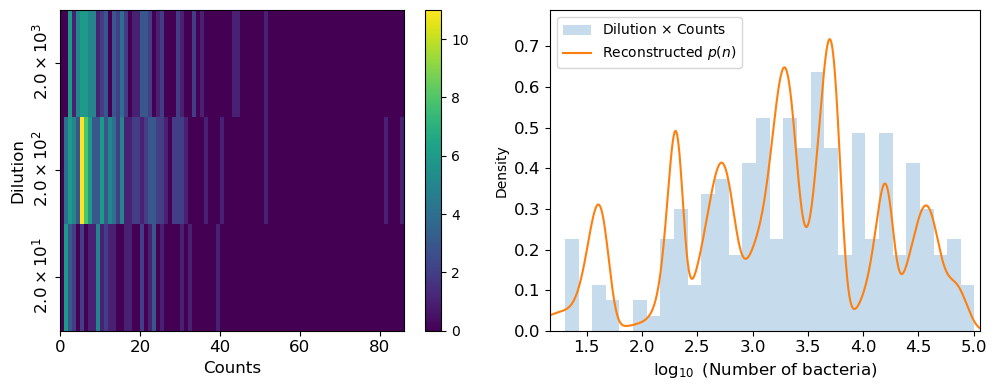

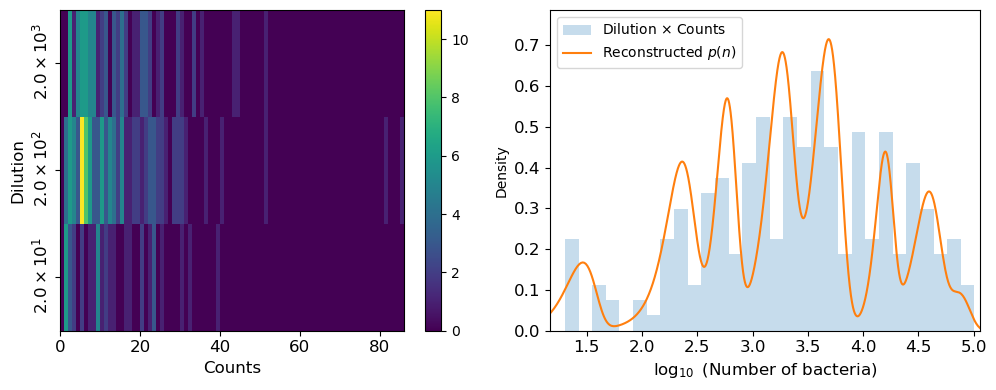

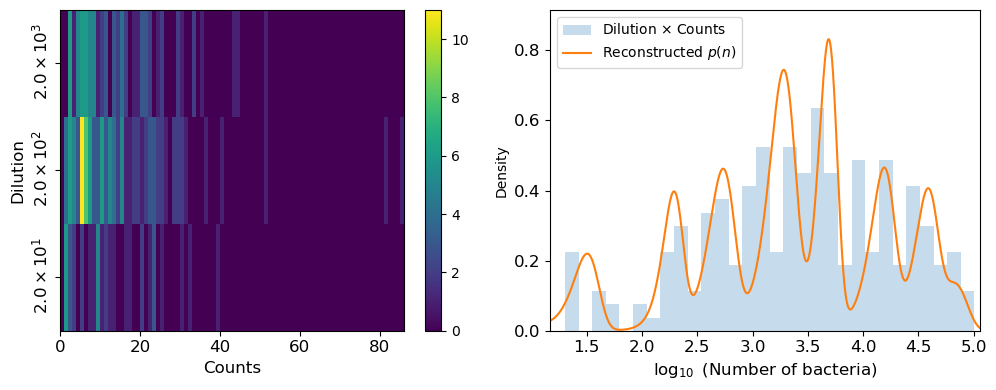

In [8]:
get_map(.9,25)
[get_map(.9,A) for A in (30,35)]
[get_map(dir,25) for dir in (.85,.95)]

tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0702, device='cuda:0', dtype=torch.float64)
tensor(0.0635, device='cuda:0', dtype=torch.float64)


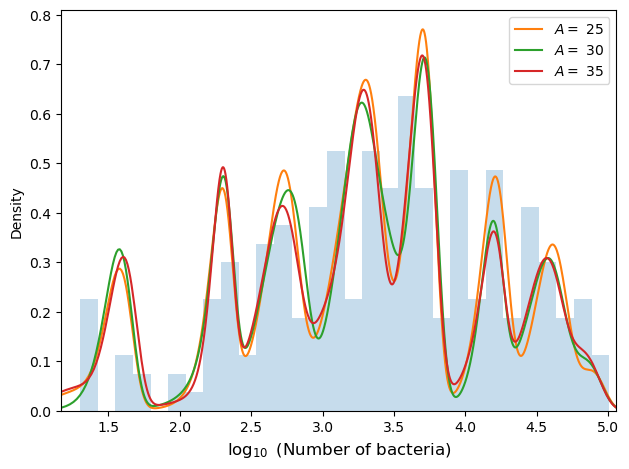

In [9]:
x = data_SA.n[1:].cpu()
l10 = 2.30258509
h = plt.hist(torch.log10(data_SA.counts*data_SA.dils).reshape(-1),alpha=.25,bins=30,density=True)

for ev,(dir,comp) in zip(g,params):
    if dir==.9:
        m,s,r = ev
        p = torch.exp(dc.Igaussmix_loglike(x,m.cpu(),s.cpu(),r.cpu()))
        plt.plot(torch.log10(x),p*x*l10,label=r'$A =$ {}'.format(comp))
        print(dc.compare_means(g[0][0],ev))

plt.xlim(h[1][0]*.9,h[1][-1]*1.01)
plt.xlabel(r'$\log_{10}$ (Number of bacteria)',fontsize=12)
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('graphs/synth/SIB/changeA.png',dpi=500)

tensor(0., device='cuda:0', dtype=torch.float64)
tensor(0.0640, device='cuda:0', dtype=torch.float64)
tensor(0.0584, device='cuda:0', dtype=torch.float64)


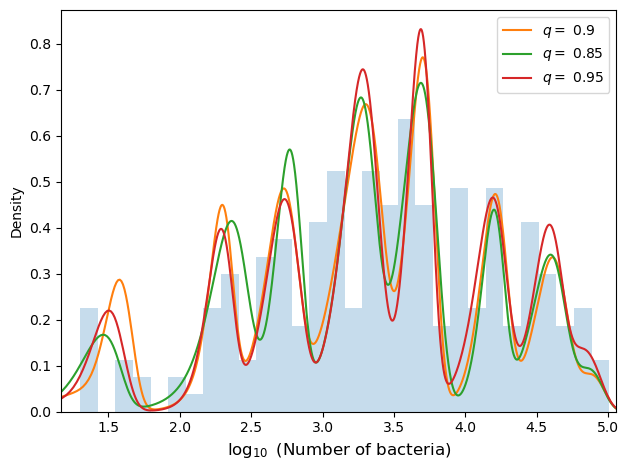

In [10]:
l10 = 2.30258509

h = plt.hist(torch.log10(data_SA.counts*data_SA.dils).reshape(-1),alpha=.25,bins=30,density=True)

for ev,(dir,comp) in zip(g,params):
    if comp == 25 and dir >.8:
        m,s,r = ev
        p = torch.exp(dc.Igaussmix_loglike(x,m.cpu(),s.cpu(),r.cpu()))
        plt.plot(torch.log10(x),p*x*l10,label=r'$q =$ {}'.format(dir))
        print(dc.compare_means(g[0][0],ev))

plt.xlim(h[1][0]*.9,h[1][-1]*1.01)
plt.xlabel(r'$\log_{10}$ (Number of bacteria)',fontsize=12)
plt.ylabel('Density')

plt.legend()
plt.tight_layout()
plt.savefig('graphs/synth/SIB/changeq.png',dpi=500)